<a href="https://colab.research.google.com/github/agntgalahad/pothole-detection/blob/main/Pothole_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [86]:
import tensorflow as tf
import keras
from keras import layers
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization, RandomFlip
import numpy as np
import matplotlib.pyplot as plt
import cv2
from google.colab import files
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [87]:
files.upload()

!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d atulyakumar98/pothole-detection-dataset

pothole-detection-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [88]:
import zipfile
!mkdir dataset
with zipfile.ZipFile('/content/pothole-detection-dataset.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/dataset/')

mkdir: cannot create directory ‘dataset’: File exists


In [89]:
from pathlib import Path
import imghdr
import os

img_link=list(Path("/content/dataset/normal").glob(r'**/*.jpg'))

count_num=0
for lnk in img_link:
    binary_img=open(lnk,'rb')
    find_img=tf.compat.as_bytes('JFIF') in binary_img.peek(10)#The JFIF is a JPEG File Interchange Format (JFIF). It is a standard which we gauge if an image is corrupt or substandard
    if not find_img:
        count_num+=1
        os.remove(str(lnk))
print('Total %d pcs image delete from Dataset' % count_num)

Total 59 pcs image delete from Dataset


In [90]:
img_link=list(Path("/content/dataset/potholes").glob(r'**/*.jpg'))

count_num=0
for lnk in img_link:
    binary_img=open(lnk,'rb')
    find_img=tf.compat.as_bytes('JFIF') in binary_img.peek(10)#The JFIF is a JPEG File Interchange Format (JFIF). It is a standard which we gauge if an image is corrupt or substandard
    if not find_img:
        count_num+=1
        os.remove(str(lnk))
print('Total %d pcs image delete from Dataset' % count_num)

Total 31 pcs image delete from Dataset


In [91]:
img_height, img_width = 227, 227
batch_size = 32
data_dir = '/content/dataset'
class_names = ['normal', 'potholes']

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split = 0.2,
    subset = 'training',
    label_mode = 'binary',
    batch_size = batch_size,
    seed = 123,
    image_size=(img_height, img_width),
)
print(train_ds)

valid_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split = 0.2,
    subset = 'validation',
    label_mode = 'binary',
    batch_size = batch_size,
    seed = 123,
    image_size=(img_height, img_width),
)
print(valid_ds)

Found 591 files belonging to 2 classes.
Using 473 files for training.
<BatchDataset element_spec=(TensorSpec(shape=(None, 227, 227, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 1), dtype=tf.float32, name=None))>
Found 591 files belonging to 2 classes.
Using 118 files for validation.
<BatchDataset element_spec=(TensorSpec(shape=(None, 227, 227, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 1), dtype=tf.float32, name=None))>


In [92]:
model2 = Sequential()



model2.add(Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[227, 227, 3]))



model2.add(MaxPooling2D(pool_size=2, strides=2))



model2.add(Conv2D(filters=32, kernel_size=3, activation='relu'))
model2.add(MaxPooling2D(pool_size=2, strides=2))

model2.add(Flatten())


model2.add(Dense(units=128, activation='relu'))

model2.add(Dense(units=1, activation='sigmoid'))

In [93]:
model2.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_28 (Conv2D)          (None, 225, 225, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 112, 112, 32)     0         
 2D)                                                             
                                                                 
 conv2d_29 (Conv2D)          (None, 110, 110, 32)      9248      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 55, 55, 32)       0         
 2D)                                                             
                                                                 
 flatten_14 (Flatten)        (None, 96800)             0         
                                                                 
 dense_28 (Dense)            (None, 128)             

In [96]:
model2.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0001), loss = 'binary_crossentropy', metrics = ['accuracy']) 
history = model2.fit(train_ds, batch_size = batch_size, verbose = 2, epochs = 10)

Epoch 1/10
15/15 - 6s - loss: 76.9888 - accuracy: 0.5560 - 6s/epoch - 392ms/step
Epoch 2/10
15/15 - 5s - loss: 1.7189 - accuracy: 0.7865 - 5s/epoch - 356ms/step
Epoch 3/10
15/15 - 5s - loss: 0.8516 - accuracy: 0.8414 - 5s/epoch - 360ms/step
Epoch 4/10
15/15 - 5s - loss: 0.4482 - accuracy: 0.8879 - 5s/epoch - 360ms/step
Epoch 5/10
15/15 - 5s - loss: 0.2964 - accuracy: 0.9408 - 5s/epoch - 358ms/step
Epoch 6/10
15/15 - 5s - loss: 0.0820 - accuracy: 0.9789 - 5s/epoch - 360ms/step
Epoch 7/10
15/15 - 5s - loss: 0.1982 - accuracy: 0.9366 - 5s/epoch - 365ms/step
Epoch 8/10
15/15 - 5s - loss: 0.1036 - accuracy: 0.9683 - 5s/epoch - 360ms/step
Epoch 9/10
15/15 - 5s - loss: 0.0586 - accuracy: 0.9725 - 5s/epoch - 361ms/step
Epoch 10/10
15/15 - 5s - loss: 0.0215 - accuracy: 0.9937 - 5s/epoch - 358ms/step


In [97]:
model2.evaluate(valid_ds, batch_size = batch_size)

4/4 [==============================] - 1s 26ms/step - loss: 0.5078 - accuracy: 0.8983


[0.5078241229057312, 0.8983050584793091]

In [99]:

!mkdir saved_models
model2.save('/content/saved_models')

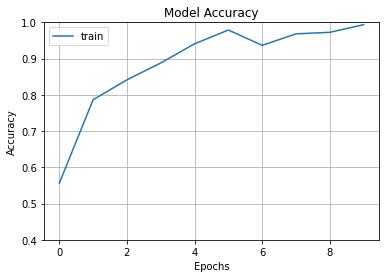

In [100]:
plt.plot(history.history['accuracy'])
plt.axis(ymin=0.4,ymax=1)
plt.grid()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()
     